# Read and plot El Nino dataset

## Description

The *El Niño* dataset consists of 70 years worth of averaged monthly sea surface temperature (SST) in degrees Celcius of the Pacific Ocean at 0-10 deg South and 90-80 deg West between 1950 and 2020.
Years 1982-83 and 1997-98 are outliers; these are the years where *El Niño* (a climate pattern characterized by warming up of the sea surface and higher air pressures) occurred with unusual intensity.

The Niño indices specifies the region where the sea temperature is considered.
* Niño 1+2 : 0-10°South, 90°West-80°West
* Niño 3 : 5°North-5°South, 150°West-90°West
* Niño 4 : 5°North-5°South, 160°East-150°West
* Niño 3.4 : 5°North-5°South, 170-120°West

<img src="nino-regions.png" width="600" />

Source : www.ncdc.noaa.gov

There are three monthly datasets.

|File|Content|Base period|
|--|--|--|
| "sstoi.indices.txt" |  OISST.v2 Niño 1+2,  Niño 3, Niño 4, Niño 3.4 |  1981-2010 |
| "ersst5.nino.mth.91-20.ascii.txt" | ERSSTv5 Niño 1+2, Niño 3, Niño 4, Niño 3.4 | 1991-2020 |
| "detrend.nino34.ascii.txt" | ERSSTv5 (centered base periods) Niño 3.4 | 1950-2020 |

In (Hyndman, Shang, 2009), p.7, the paper analyses data from "January 1951 to December 2007" from "sstoi.indices". The paper considers the data for the region "defined by the coordinates 0 − 10◦ South and 90 − 80◦ West", which corresponds to Niño 1+2. 

## Source

* NOOA. National Weather Service. Climate Prediction Center. https://www.cpc.ncep.noaa.gov/data/indices/
* https://climatedataguide.ucar.edu/climate-data/nino-sst-indices-nino-12-3-34-4-oni-and-tni
* https://www.ncdc.noaa.gov/teleconnections/enso/indicators/sst/
* "Rainbow plots, bagplots and boxplots for functional data". Rob J Hyndman and Han Lin Shang. June 5, 2009

In [1]:
import os
import openturns as ot
import othdrplot as othdr
import openturns.viewer as otv
import numpy as np

## sstoi.indices.txt : OISST.v2

In [2]:
basename = "sstoi.indices.txt"
filename = os.path.join(othdr.__path__[0], "data", basename)
separatorstr = " "
data = ot.Sample.ImportFromTextFile(filename, separatorstr)
data.setDescription(
    [
        "YR",
        "MON",
        "NINO1+2",
        "ANOM",
        "NINO3",
        "ANOM",
        "NINO4",
        "ANOM",
        "NINO3.4",
        "ANOM",
    ]
)
data[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=10 description=[YR,MON,NINO1+2,ANOM,NINO3,ANOM,NINO4,ANOM,NINO3.4,ANOM] data=[[1982,1,24.29,-0.17,25.87,0.24,28.3,0,26.72,0.15],[1982,2,25.49,-0.58,26.38,0.01,28.21,0.11,26.7,-0.02],[1982,3,25.21,-1.31,26.98,-0.16,28.41,0.22,27.2,-0.02],[1982,4,24.5,-0.97,27.68,0.18,28.92,0.42,28.02,0.24],[1982,5,23.97,-0.23,27.79,0.71,29.49,0.7,28.54,0.69]]

We are interested in the NINO1+2 data, which is the third column in the dataset. The data ranges from 1950 to 2020.

In [3]:
np.unique(data[:, 0])

array([1982., 1983., 1984., 1985., 1986., 1987., 1988., 1989., 1990.,
       1991., 1992., 1993., 1994., 1995., 1996., 1997., 1998., 1999.,
       2000., 2001., 2002., 2003., 2004., 2005., 2006., 2007., 2008.,
       2009., 2010., 2011., 2012., 2013., 2014., 2015., 2016., 2017.,
       2018., 2019., 2020.])

The dataset has one row per month, starting from 1950.

In [4]:
number_of_rows = data.getSize()
number_of_rows

468

Assuming 12 months per year, compute the number of years:

In [5]:
number_of_years = int(number_of_rows / 12.0)
number_of_years

39

Notice that we have cut the file so that there are exactly 12 months per year, with complete years. 

There are five columns but we are interested only in the "NINO1+2" column, which has index 2. Reshape the data with numpy, so that the sample contains one row per year. 

In [6]:
total_column = np.array(data[:, 2]).reshape((number_of_years, 12))
sample = ot.Sample(total_column)
sample.setDescription(
    ["Jan", "Fev", "Mar", "Apr", "May", "Jun", "Jui", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=12 description=[Jan,Fev,Mar,Apr,May,Jun,Jui,Aug,Sep,Oct,Nov,Dec] data=[[24.29,25.49,25.21,24.5,23.97,22.89,22.47,21.75,21.8,22.94,24.59,26.13],[27.42,28.09,28.68,28.56,28.19,27.44,25.95,23.78,22.24,21.86,21.9,23.01],[24.18,25.18,26,25.16,23.23,21.96,21.24,20.17,20.37,20.52,21.5,22.58],[23.59,24.87,25.74,24.25,22.29,21.75,20.44,19.29,19.44,19.9,20.69,22.4],[24.61,26.06,25.91,24.58,23.38,21.98,21.12,20.97,20.44,21.07,22.03,23]]

The row 0 contains the data for 1950, as can be seen by comparison with the data read in the file. 

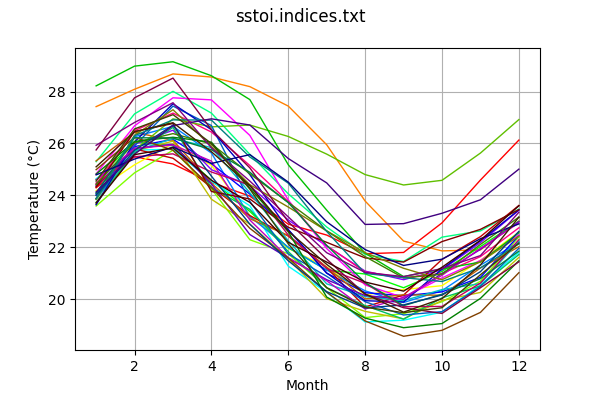

In [7]:
graph = ot.Graph(basename, "Month", "Temperature (°C)", True)
for i in range(number_of_years):
    curve = ot.Curve(range(1, 13), sample[i])
    graph.add(curve)
graph.setColors(ot.DrawableImplementation_BuildRainbowPalette(number_of_years))
graph

This is very similar to the Figure 2, p.7 in (Hyndman, Shang, 2009), except the colors.

## ersst5.nino.mth.91-20.ascii.txt : ERSSTv5

In [8]:
basename = "ersst5.nino.mth.91-20.ascii.txt"
filename = os.path.join(othdr.__path__[0], "data", basename)
separatorstr = " "
data = ot.Sample.ImportFromTextFile(filename, separatorstr)
data.setDescription(
    [
        "YR",
        "MON",
        "NINO1+2",
        "ANOM",
        "NINO3",
        "ANOM",
        "NINO4",
        "ANOM",
        "NINO3.4",
        "ANOM",
    ]
)
data[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=10 description=[YR,MON,NINO1+2,ANOM,NINO3,ANOM,NINO4,ANOM,NINO3.4,ANOM] data=[[1950,1,23.01,-1.55,23.56,-2.1,26.94,-1.38,24.55,-1.99],[1950,2,24.32,-1.78,24.89,-1.52,26.67,-1.53,25.06,-1.69],[1950,3,25.11,-1.38,26.36,-0.84,26.52,-1.8,25.87,-1.42],[1950,4,23.63,-1.9,26.44,-1.14,26.9,-1.73,26.28,-1.54],[1950,5,22.68,-1.74,25.69,-1.57,27.73,-1.18,26.18,-1.75]]

We are interested in the "NINO1+2" data, which is the third column in the dataset. The data ranges from 1950 to 2020.

In [9]:
np.unique(data[:, 0])

array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.])

The dataset has one row per month, starting from 1950.

In [10]:
number_of_rows = data.getSize()
number_of_rows

852

Assuming 12 months per year, compute the number of years:

In [11]:
number_of_years = int(number_of_rows / 12.0)
number_of_years

71

Notice that we have cut the file so that there are exactly 12 months per year, with complete years. 

There are five columns but we are interested only in the "NINO1+2" column, which has index 2. Reshape the data with numpy, so that the sample contains one row per year. 

In [12]:
total_column = np.array(data[:, 2]).reshape((number_of_years, 12))
sample = ot.Sample(total_column)
sample.setDescription(
    ["Jan", "Fev", "Mar", "Apr", "May", "Jun", "Jui", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=12 description=[Jan,Fev,Mar,Apr,May,Jun,Jui,Aug,Sep,Oct,Nov,Dec] data=[[23.01,24.32,25.11,23.63,22.68,21.33,20.31,20.12,19.56,19.99,19.85,21.72],[24.11,25.19,25.74,25.29,24.59,24.61,23.82,22.18,21.29,21.74,22.34,22.83],[24.36,26.02,26.08,24.44,23.48,21.93,20.73,19.89,19.37,20.37,20.83,22.31],[24.13,26.27,27.22,27,25.43,23.43,21.96,21.18,21.06,20.84,21.51,22.22],[22.66,24.88,25.17,22.45,21.43,20.66,19.13,19.31,19.02,18.98,20.2,21.34]]

The row 0 contains the data for 1950, as can be seen by comparison with the data read in the file. 

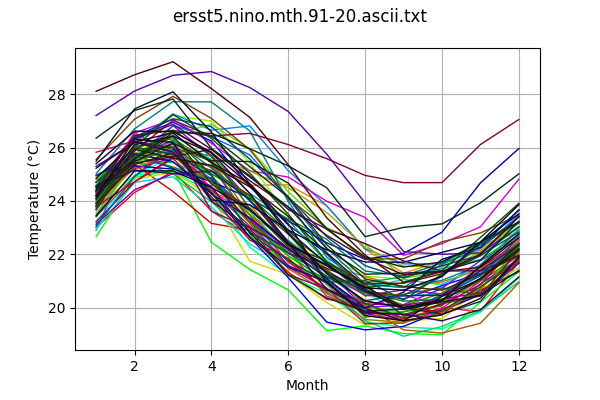

In [13]:
graph = ot.Graph(basename, "Month", "Temperature (°C)", True)
for i in range(number_of_years):
    curve = ot.Curve(range(1, 13), sample[i])
    graph.add(curve)
graph.setColors(ot.DrawableImplementation_BuildRainbowPalette(number_of_years))
graph

## detrend.nino34.ascii.txt : ERSSTv5, Niño 3.4

In [14]:
basename = "detrend.nino34.ascii.txt"
filename = os.path.join(othdr.__path__[0], "data", basename)
separatorstr = " "
data = ot.Sample.ImportFromTextFile(filename, separatorstr)
data.setDescription(["YR", "MON", "TOTAL", "ClimAdjust", "ANOM"])
data[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=5 description=[YR,MON,TOTAL,ClimAdjust,ANOM] data=[[1950,1,24.56,26.18,-1.62],[1950,2,25.07,26.39,-1.32],[1950,3,25.88,26.95,-1.07],[1950,4,26.29,27.39,-1.11],[1950,5,26.19,27.56,-1.37]]

We are interested in the "Total" data, which is the third column in the dataset. The data ranges from 1950 to 2020.

In [15]:
np.unique(data[:, 0])

array([1950., 1951., 1952., 1953., 1954., 1955., 1956., 1957., 1958.,
       1959., 1960., 1961., 1962., 1963., 1964., 1965., 1966., 1967.,
       1968., 1969., 1970., 1971., 1972., 1973., 1974., 1975., 1976.,
       1977., 1978., 1979., 1980., 1981., 1982., 1983., 1984., 1985.,
       1986., 1987., 1988., 1989., 1990., 1991., 1992., 1993., 1994.,
       1995., 1996., 1997., 1998., 1999., 2000., 2001., 2002., 2003.,
       2004., 2005., 2006., 2007., 2008., 2009., 2010., 2011., 2012.,
       2013., 2014., 2015., 2016., 2017., 2018., 2019., 2020.])

The dataset has one row per month, starting from 1950.

In [16]:
number_of_rows = data.getSize()
number_of_rows

852

Assuming 12 months per year, compute the number of years:

In [17]:
number_of_years = int(number_of_rows / 12.0)
number_of_years

71

Notice that we have cut the file so that there are exactly 12 months per year, with complete years. 

There are five columns but we are interested only in the "Total" column, which has index 2. Reshape the data with numpy, so that the sample contains one row per year. 

In [18]:
total_column = np.array(data[:, 2]).reshape((number_of_years, 12))
sample = ot.Sample(total_column)
sample.setDescription(
    ["Jan", "Fev", "Mar", "Apr", "May", "Jun", "Jui", "Aug", "Sep", "Oct", "Nov", "Dec"]
)
sample[:5]

class=Sample name=Unnamed implementation=class=SampleImplementation name=Unnamed size=5 dimension=12 description=[Jan,Fev,Mar,Apr,May,Jun,Jui,Aug,Sep,Oct,Nov,Dec] data=[[24.56,25.07,25.88,26.29,26.19,26.47,26.28,25.88,25.73,25.68,25.46,25.29],[25.26,25.72,26.91,27.59,27.93,27.73,27.59,27.01,27.22,27.2,27.25,26.92],[26.67,26.75,27.19,27.81,27.79,27.18,26.52,26.3,26.35,26.25,25.92,26.21],[26.74,27,27.57,28.03,28.28,28.12,27.42,26.93,27,26.87,26.88,27.01],[26.98,27.03,26.91,26.65,27.11,26.79,26.1,25.42,25.11,25.22,25.56,25.26]]

The row 0 contains the data for 1950, as can be seen by comparison with the data read in the file. 

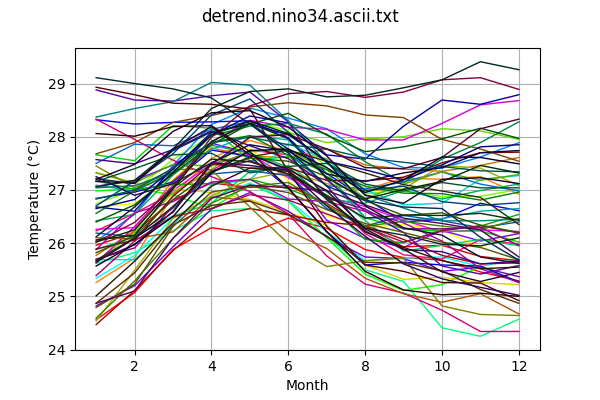

In [19]:
graph = ot.Graph(basename, "Month", "Temperature (°C)", True)
for i in range(number_of_years):
    curve = ot.Curve(range(1, 13), sample[i])
    graph.add(curve)
graph.setColors(ot.DrawableImplementation_BuildRainbowPalette(number_of_years))
graph